In [1]:
# Import the necessary libraries
import pyazr

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from tqdm import tqdm
from brick.azr import AZR as brick

# Define the data labels (in AZURE2 order)
labels = ["Meyer et al. (1976) - 84.3 deg",
          "Meyer et al. (1976) - 114.5 deg",
          "Meyer et al. (1976) - 144.1 deg", 
          "LUNA HPGe (2023)", 
          "LUNA BGO (2023)",
          "Felsenkeller (2023)",
          "ATOMKI (2023)",
          "Notre Dame (2023) - 0 deg",
          "Notre Dame (2023) - 55 deg",
          "Burtebaev et al. (2008)",
          "Lamb et al. (1957)",
          "Bailey et al. (1950)",
          "Vogl et al. (1963)",
          "Rolfs et al. (1974) - 0 deg",
          "Rolfs et al. (1974) - 90 deg"]

# Define the colors for the data
colors = { "Meyer et al. (1976) - 84.3 deg": "black",
           "Meyer et al. (1976) - 114.5 deg": "black",
           "Meyer et al. (1976) - 144.1 deg": "black",
           "LUNA HPGe (2023)": "black",
           "LUNA BGO (2023)": "black",
           "Felsenkeller (2023)": "cornflowerblue",
           "ATOMKI (2023)": "green",
           "Notre Dame (2023) - 0 deg": "darkcyan",
           "Notre Dame (2023) - 55 deg": "darkcyan",
           "Burtebaev et al. (2008)": "violet",
           "Lamb et al. (1957)": "grey",
           "Bailey et al. (1950)": "darkorchid",
           "Vogl et al. (1963)": "peru",
           "Rolfs et al. (1974) - 0 deg": "goldenrod",
           "Rolfs et al. (1974) - 90 deg": "goldenrod"
           }

# Define the formats for markers
fmt = { "Meyer et al. (1976) - 84.3 deg": "o",
        "Meyer et al. (1976) - 114.5 deg": "o",
        "Meyer et al. (1976) - 144.1 deg": "o",
        "LUNA HPGe (2023)": "o",
        "LUNA BGO (2023)": "v",
        "Felsenkeller (2023)": "o",
        "ATOMKI (2023)": "o",
        "Notre Dame (2023) - 0 deg": "o",
        "Notre Dame (2023) - 55 deg": "v",
        "Burtebaev et al. (2008)": "o",
        "Lamb et al. (1957)": "o",
        "Bailey et al. (1950)": "o",
        "Vogl et al. (1963)": "o",
        "Rolfs et al. (1974) - 0 deg": "o",
        "Rolfs et al. (1974) - 90 deg": "v"
        }

# Select segments to plot
segments = [3, 4, 5, 6, 9, 10, 11, 12, 7, 8, 13, 14]

In [2]:
# Prepare pyazr
azr = pyazr.azure2( "12c_pg.azr" )

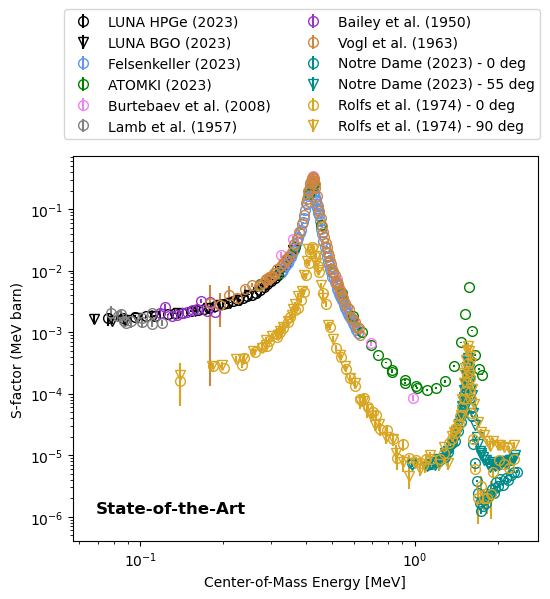

In [5]:
fig, ax = plt.subplots( figsize=(6,5) )

for i in segments:
    norm = 1
    if( "Rolfs" in labels[i] ): norm = 1.3
    elif( "Vogl" in labels[i] ): norm = 1.3
    (line, _ , _) = ax.errorbar( azr.energies[i], azr.sfactor[i] * norm, yerr=azr.sfactor_err[i] * norm, fmt=fmt[labels[i]], label=labels[i], color=colors[labels[i]], markersize=7 )
    line.set_markerfacecolor('none')

ax.set_yscale( 'log' )
ax.set_xscale( 'log' )

ax.set_ylabel( "S-factor (MeV barn)" )
ax.set_xlabel( "Center-of-Mass Energy [MeV]")

ax.set_title( "State-of-the-Art", y=0.05, x=0.05, fontsize=12, fontweight='bold', horizontalalignment='left' )

plt.legend( ncol=2, bbox_to_anchor=(1.02, 1.40) )
    
plt.savefig( "results/figures/literature.pdf", bbox_inches='tight' )
plt.show( )